## Assignment 2 : stock return distribution and MVF

## Problem 1

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from tabulate import tabulate
import wrds


In [22]:
db = wrds.Connection(wrds_username='zak_souid')

Loading library list...
Done


Because we cannot find Tesla in the database, we use the provided .csv file.

In [3]:
data = pd.read_csv('Returns_Stocks.csv', sep=';')

Generation of the time-serie S

In [4]:
S = pd.DataFrame(data = {'AAPL': data.AAPL.values, 'GE': data.GE.values, 'GME': data.GME.values, 'PG': data.PG.values, 'TSLA': data.TSLA.values }, index =  pd.to_datetime(data.date.values))
winsorized_S = S[abs(S) < 0.04]
S

,AAPL,GE,GME,PG,TSLA
2001-01-02,0.000000,-0.087353,NaN,0.000797,NaN
2001-01-03,0.100840,0.092857,NaN,-0.049363,NaN
2001-01-04,0.041985,0.005229,NaN,-0.030988,NaN
2001-01-05,-0.040293,-0.015605,NaN,0.036301,NaN
2001-01-08,0.011450,-0.036988,NaN,0.021685,NaN
...,...,...,...,...,...
2022-12-23,-0.002798,0.000245,-0.017551,0.002825,0.013630
2022-12-27,-0.013878,0.012838,-0.114089,0.008714,-0.093625
2022-12-28,-0.030685,-0.010502,0.033089,-0.012926,-0.015385
2022-12-29,0.028324,0.021715,0.080827,0.004146,0.022879


### Point (a) 
Stocks' mean and variance of daily simple returns.

In [5]:
mean = S.mean()
winsorized_mean = winsorized_S.mean()
print('Mean of simple returns:\n', mean)

Mean of simple returns:
 AAPL    0.001409
GE      0.000059
GME     0.002026
PG      0.000421
TSLA    0.001590
dtype: float64


In [6]:
std = S.std()
winsorized_std = winsorized_S.std()
print('Standard deviation of simple returns:\n', std)

Standard deviation of simple returns:
 AAPL    0.022858
GE      0.021084
GME     0.035991
PG      0.011843
TSLA    0.050628
dtype: float64


### Point (b)
Empirical density function of stock returns.

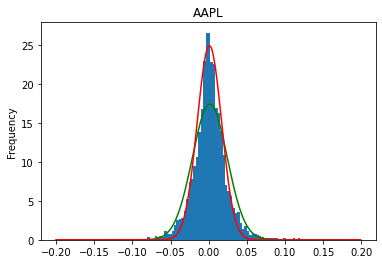

In [7]:
S.AAPL.plot.hist(bins=100,density=True,label='empirical density')
x = np.arange(-0.2, 0.2, 0.001)
plt.plot(x, norm.pdf(x, mean.AAPL, std.AAPL), color='green')
plt.plot(x, norm.pdf(x, winsorized_mean.AAPL, winsorized_std.AAPL), color='red')
plt.title('AAPL')
plt.show()

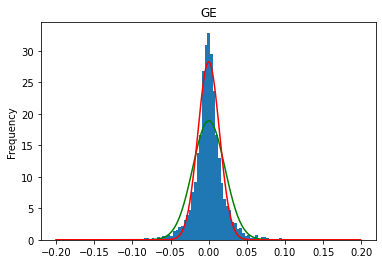

In [8]:
S.GE.plot.hist(bins=100,density=True,label='empirical density')
x = np.arange(-0.2, 0.2, 0.001)
plt.plot(x, norm.pdf(x, mean.GE, std.GE), color='green')
plt.plot(x, norm.pdf(x, winsorized_mean.GE, winsorized_std.GE), color='red')
plt.title('GE')
plt.show()

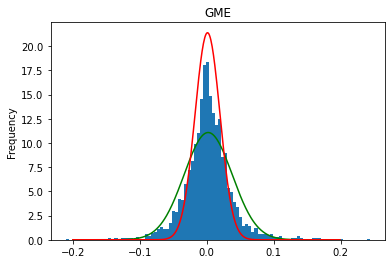

In [9]:
S.GME.plot.hist(bins=100,density=True,label='empirical density')
x = np.arange(-0.2, 0.2, 0.001)
plt.plot(x, norm.pdf(x, mean.GME, std.GME), color='green')
plt.plot(x, norm.pdf(x, winsorized_mean.GME, winsorized_std.GME), color='red')
plt.title('GME')
plt.show()

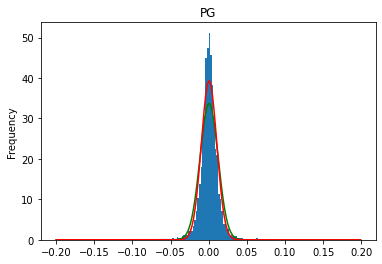

In [10]:
S.PG.plot.hist(bins=100,density=True,label='empirical density')
x = np.arange(-0.2, 0.2, 0.001)
plt.plot(x, norm.pdf(x, mean.PG, std.PG), color='green')
plt.plot(x, norm.pdf(x, winsorized_mean.PG, winsorized_std.PG), color='red')
plt.title('PG')
plt.show()

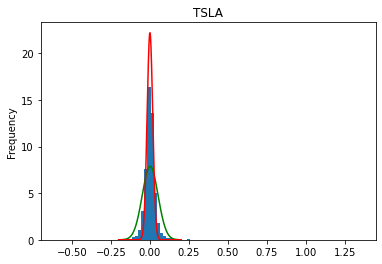

In [11]:
S.TSLA.plot.hist(bins=100,density=True,label='empirical density')
x = np.arange(-0.2, 0.2, 0.001)
plt.plot(x, norm.pdf(x, mean.TSLA, std.TSLA), color='green')
plt.plot(x, norm.pdf(x, winsorized_mean.TSLA, winsorized_std.TSLA), color='red')
plt.title('TSLA')
plt.show()

For all the stocks the normal distribution with mean and variance of the ‘winsorized’ empirical distribution is a better approximation of our empirical density function than the normal distribution with the same mean and variance as the empirical distribution.

### Point (c)
Value-at-risk and conditional expectation shortfall.

In [12]:
S.sort_values(by = ['AAPL', 'GE', 'GME', 'PG', 'TSLA'],inplace = True, ascending = True)

In [13]:
# normal distribution Var and expected shortfall
Var_95_normal = norm.ppf(1-0.95, mean, std)
Var_99_normal = norm.ppf(1-0.99, mean, std)
CVaR_95_normal = S[S <= Var_95_normal].mean()
CVaR_99_normal = S[S <= Var_99_normal].mean()

# empirical Var and expected shortfall
S.sort_values(by = ['AAPL', 'GE', 'GME', 'PG', 'TSLA'],inplace = True, ascending = True)
Var_95_empirical = S.quantile(0.05)
Var_99_empirical = S.quantile(0.01)
CVaR_95_empirical = S[S <= Var_95_empirical].mean()
CVaR_99_empirical = S[S <= Var_99_empirical].mean()

Results of VaRs and expected shortfalls from the normal distribution with mean and variance as the empirical distribution.

In [14]:
print(tabulate([['AAPL', np.round(Var_95_normal[0]*100,3), np.round(Var_99_normal[0]*100,3), np.round(CVaR_95_normal[0]*100,3), np.round(CVaR_99_normal[0]*100,3)],
                ['GE', np.round(Var_95_normal[1]*100,3), np.round(Var_99_normal[1]*100,3), np.round(CVaR_95_normal[1]*100,3), np.round(CVaR_99_normal[1]*100,3)],
                ['GME', np.round(Var_95_normal[2]*100,3), np.round(Var_99_normal[2]*100,3), np.round(CVaR_95_normal[2]*100,3), np.round(CVaR_99_normal[2]*100,3)],
                ['PG', np.round(Var_95_normal[3]*100,3), np.round(Var_99_normal[3]*100,3), np.round(CVaR_95_normal[3]*100,3), np.round(CVaR_99_normal[3]*100,3)],
                ['TSLA', np.round(Var_95_normal[4]*100,3), np.round(Var_99_normal[4]*100,3), np.round(CVaR_95_normal[4]*100,3), np.round(CVaR_99_normal[4]*100,3)]], 
                headers=['Stock','VaR 95% (%)', 'VaR 99% (%)','CVaR 95% (%)', 'CVaR 99% (%)'],tablefmt = 'fancy_grid',stralign = 'center', numalign= 'center',floatfmt=".2f"))

╒═════════╤═══════════════╤═══════════════╤════════════════╤════════════════╕
│  Stock  │  VaR 95% (%)  │  VaR 99% (%)  │  CVaR 95% (%)  │  CVaR 99% (%)  │
╞═════════╪═══════════════╪═══════════════╪════════════════╪════════════════╡
│  AAPL   │     -3.62     │     -5.18     │     -5.23      │     -7.07      │
├─────────┼───────────────┼───────────────┼────────────────┼────────────────┤
│   GE    │     -3.46     │     -4.90     │     -5.44      │     -7.11      │
├─────────┼───────────────┼───────────────┼────────────────┼────────────────┤
│   GME   │     -5.72     │     -8.17     │     -8.55      │     -11.55     │
├─────────┼───────────────┼───────────────┼────────────────┼────────────────┤
│   PG    │     -1.91     │     -2.71     │     -3.06      │     -4.01      │
├─────────┼───────────────┼───────────────┼────────────────┼────────────────┤
│  TSLA   │     -8.17     │    -11.62     │     -13.97     │     -20.34     │
╘═════════╧═══════════════╧═══════════════╧════════════════╧════

Results of VaRs and expected shortfalls from the empirical distribution.

In [15]:
print(tabulate([['AAPL', np.round(Var_95_empirical[0]*100,3), np.round(Var_99_empirical[0]*100,3), np.round(CVaR_95_empirical[0]*100,3), np.round(CVaR_99_empirical[0]*100,3)],
                ['GE', np.round(Var_95_empirical[1]*100,3), np.round(Var_99_empirical[1]*100,3), np.round(CVaR_95_empirical[1]*100,3), np.round(CVaR_99_empirical[1]*100,3)],
                ['GME', np.round(Var_95_empirical[2]*100,3), np.round(Var_99_empirical[2]*100,3), np.round(CVaR_95_empirical[2]*100,3), np.round(CVaR_99_empirical[2]*100,3)],
                ['PG', np.round(Var_95_empirical[3]*100,3), np.round(Var_99_empirical[3]*100,3), np.round(CVaR_95_empirical[3]*100,3), np.round(CVaR_99_empirical[3]*100,3)],
                ['TSLA', np.round(Var_95_empirical[4]*100,3), np.round(Var_99_empirical[4]*100,3), np.round(CVaR_95_empirical[4]*100,3), np.round(CVaR_99_empirical[4]*100,3)]], 
                headers=['Stock','VaR 95% (%)', 'VaR 99% (%)','CVaR 95% (%)', 'CVaR 99% (%)'],tablefmt = 'fancy_grid',stralign = 'center', numalign= 'center',floatfmt=".2f"))

╒═════════╤═══════════════╤═══════════════╤════════════════╤════════════════╕
│  Stock  │  VaR 95% (%)  │  VaR 99% (%)  │  CVaR 95% (%)  │  CVaR 99% (%)  │
╞═════════╪═══════════════╪═══════════════╪════════════════╪════════════════╡
│  AAPL   │     -3.41     │     -5.76     │     -5.02      │     -7.93      │
├─────────┼───────────────┼───────────────┼────────────────┼────────────────┤
│   GE    │     -3.10     │     -6.12     │     -5.00      │     -8.43      │
├─────────┼───────────────┼───────────────┼────────────────┼────────────────┤
│   GME   │     -5.11     │     -9.00     │     -7.89      │     -12.74     │
├─────────┼───────────────┼───────────────┼────────────────┼────────────────┤
│   PG    │     -1.68     │     -3.34     │     -2.77      │     -4.72      │
├─────────┼───────────────┼───────────────┼────────────────┼────────────────┤
│  TSLA   │     -5.07     │    -10.68     │     -8.79      │     -17.19     │
╘═════════╧═══════════════╧═══════════════╧════════════════╧════

### Point (d)

The normal distribution doesn't seem to describe appropriately the distribution of daily stock returns: from the charts it's clear that the normal distribution underestimates the empirical distribution for central values and overestimates the empirical distribution for tail values (the tails of the empirical distribution is wider than the tail of its normal estimation).
From the tables, we can notice that VaRs and expected shortfalls are, in absolute value, bigger for the normal distribution than for the empirical one. 

With the windsorized data we filter out the "extreme moves", and it fit well the center of the distribution but underestimate the probability of large moves.

A more accurate model of daily stock returns could have a brownian motion calibrated to match the returns without the large moves. 
Then, we would add separately the large but infrequent moves by adding jumps to the stochastic process.


### Point (e)
Comparison of results in Point (b) with empirical density function of 2-year and 10-year bond returns.   

In [16]:
data_bonds = pd.read_csv('Returns_Bonds.csv', sep=';')

In [17]:
S_bonds = pd.DataFrame(data = {'two': data_bonds.b2ret.values, 'ten': data_bonds.b10ret.values}, index =  pd.to_datetime(data_bonds.date.values))
winsorized_S_bonds = S_bonds[abs(S_bonds) < 0.04]

In [18]:
mean_bonds = S_bonds.mean()
winsorized_mean_bonds = winsorized_S_bonds.mean()
std_bonds = S_bonds.std()
winsorized_std_bonds = winsorized_S_bonds.std()

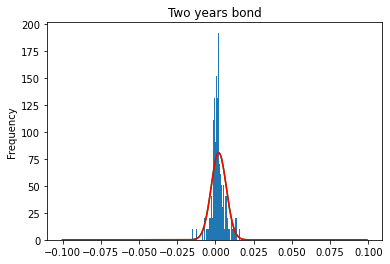

In [19]:
S_bonds.two.plot.hist(bins=100,density=True,label='empirical density')
x = np.arange(-0.1, 0.1, 0.001)
plt.plot(x, norm.pdf(x, mean_bonds.two, std_bonds.two), color='green')
plt.plot(x, norm.pdf(x, winsorized_mean_bonds.two, winsorized_std_bonds.two), color='red')
plt.title('Two years bond')
plt.show()

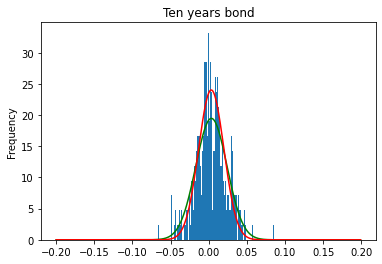

In [20]:
S_bonds.ten.plot.hist(bins=100,density=True,label='empirical density')
x = np.arange(-0.2, 0.2, 0.001)
plt.plot(x, norm.pdf(x, mean_bonds.ten, std_bonds.ten), color='green')
plt.plot(x, norm.pdf(x, winsorized_mean_bonds.ten, winsorized_std_bonds.ten), color='red')
plt.title('Ten years bond')
plt.show()

In the case of the two-year treasury bond there is no difference between the normal distribution with mean and variance of the empirical distribution and the normal distribution with mean and variance of the ‘winsorized’ empirical distribution; the normal distribution results in a good approximation of the empirical one (except for some outliars).\
In the case of the ten-year treasury bond there is difference between the two normal distribution; these are quite close or at least closer than we saw for stock returns. Anyway, as before, the normal distribution with mean and variance of the ‘winsorized’ empirical distribution is a better approximation of the empirical distribution that the other one.\
Bond returns depends on interest rates that usually don't change so much in a fixed period; stock returns are effected by lots of factors that are also specific to the firm we are considering and that are more difficult to predict. Maybe this is the reason why the normal distribution is not a good approximation of stock returns.

However it hard to decide if the normal pdf is a good descritpion for the bonds return, because there is not enough data to render a good histogram estimate of the density function. Compared to the daily sotck return time there is 20 times less data. However like (c), the VaR and Expected shortfall normal estimates are lower than the empiricals statistics, this is a hint that the normal pdf does not describe well the tails events for both stock and bonds return. Although the error is lower for the 10 year bond.

## Problem 2 

In [24]:
aapl = db.raw_sql("select date, ret from crsp.dsf where permco in (7) and date >= '2000-01-01' and date <= '2022-12-31'")
pg = db.raw_sql("select date, ret from crsp.dsf where permco in (21446) and date >= '2000-01-01' and date <= '2022-12-31'")
# these are daily returns, we need weekly returns

In [25]:
S = pd.DataFrame(data = {'AAPL': aapl['ret'].values , 'PG': pg['ret'].values},
                 index =  pd.to_datetime(aapl['date'].values))

In [26]:
r_f = 0.015

### Point (a)
Estimation of the expected return, the standard deviation for each stock and the correlation between them.

We use the formula of the simple returns over k period:
$R_t(k)=\prod_{j=0}^{k-1}(1+R_{t-j})-1$
to compute the weekly returns:

In [27]:
S = (1+S).resample('W').prod()-1 

In [28]:
aapl_mean = round(S.AAPL.mean()*52,3)
pg_mean = round(S.PG.mean()*52,3)
print('The expected returns for Apple and Procter and Gamble are respectively:', aapl_mean, ',', pg_mean, '.')

The expected returns for Apple and Procter and Gamble are respectively: 0.296 , 0.094 .


In [29]:
aapl_std = round(S.AAPL.std()*np.sqrt(52),3)
pg_std = round(S.PG.std()*np.sqrt(52),3)
print('The standard deviations for Apple and Procter and Gamble are respectively:', aapl_std, ',', pg_std, '.')

The standard deviations for Apple and Procter and Gamble are respectively: 0.376 , 0.208 .


In [32]:
corr=S.corr().at['AAPL','PG']
print('The correlation between stocks is:', round(corr,3),'.')

The correlation between stocks is: 0.106 .


### Point (b) 
Mean-standard deviation frontier combining the two risky assets.

In [33]:
# weight: part of the wealth invested in Apple
# 1 - weight: part of the wealth invested in Procter and Gamble
weight = np.linspace(start=0, stop=1.01, num=1000)
# frontier where only weight between 0 and 1 are ammissible 
expected_return = weight * aapl_mean + (1-weight) * pg_mean
# expected return of the two risky assets porfolio
standard_deviation = np.sqrt(weight ** 2 * aapl_std ** 2 + (1 - weight) ** 2 * pg_std ** 2 + 2 * weight * (1-weight) * corr * aapl_std * pg_std)
# standard deviation of the two risky assets portfolio

In [34]:
weight_short = np.linspace(start=-0.7, stop=1.5, num=1000)
# frontier where an investor can short sell
expected_return_short = weight_short * aapl_mean + (1-weight_short) * pg_mean
standard_deviation_short = np.sqrt(weight_short ** 2 * aapl_std ** 2 + (1 - weight_short) ** 2 * pg_std ** 2 + 2 * weight_short * (1-weight_short) * corr * aapl_std * pg_std)

<function matplotlib.pyplot.show(close=None, block=None)>

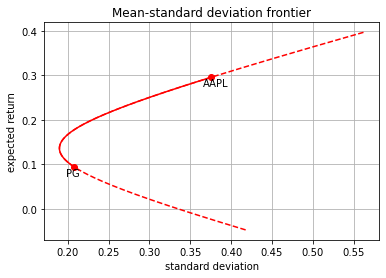

In [35]:
plt.plot(standard_deviation, expected_return, linestyle='-', c='red')
plt.plot(standard_deviation_short, expected_return_short, linestyle='--', c='red')
plt.plot(aapl_std,aapl_mean,'ro')
plt.annotate('AAPL', (aapl_std, aapl_mean), xytext=(aapl_std-0.01,aapl_mean-0.02))
plt.plot(pg_std,pg_mean,'ro')
plt.annotate('PG', (pg_std, pg_mean), xytext=(pg_std-0.01,pg_mean-0.02))
plt.xlabel('standard deviation')
plt.ylabel('expected return')
plt.title('Mean-standard deviation frontier')
plt.grid(True)
plt.show

### Point (c)
Computation of the portfolio weights of the global minimum variance portfolio and its expected return, standard deviation, and sharpe Ratio.

We use the formula of the lecture to find the optimal weight for minimum global variance:
    $w_{A,min}=\frac{\sigma_B^2-\rho\sigma_A\sigma_B}{\sigma_A^2+\sigma_B^2-2\rho\sigma_A\sigma_B}$

In [41]:
w_opt=(pg_std**2-corr*aapl_std*pg_std)/(aapl_std**2+pg_std**2-2*corr*aapl_std*pg_std)
Expreturn_opt=w_opt*aapl_mean+(1-w_opt)*pg_mean
std_opt=np.sqrt(w_opt**2*aapl_std**2+(1-w_opt)**2*pg_std**2+2*w_opt*(1-w_opt)*aapl_std*pg_std*corr)
SR=(Expreturn_opt-r_f)/std_opt


print('The global minimum portfolio variance invests', round(w_opt * 100,2),'% in Apple and', round((1-w_opt)*100,2), '% in Procter and Gamble.')
print('Global minumim portfolio expected return and standard deviation are respectively:', round(Expreturn_opt,2), ',', round(std_opt,2),'.')
print('The sharpe ratio of our portfolio is:', SR,'.')

The global minimum portfolio variance invests 20.81 % in Apple and 79.19 % in Procter and Gamble.
Global minumim portfolio expected return and standard deviation are respectively: 0.14 , 0.19 .
The sharpe ratio of our portfolio is: 0.6381113813598136 .


Point (d): \
Mean-standard deviation frontier combining the two risky asset and the risk-free asset.

In [42]:
sharpe_ratio = (expected_return-r_f)/standard_deviation
optimal_sharpe = sharpe_ratio.max()
# index_tan = np.argmax(sharpe_ratio)
x = np.linspace(start=0, stop=0.6, num=1000)
y = r_f + optimal_sharpe * x

<function matplotlib.pyplot.show(close=None, block=None)>

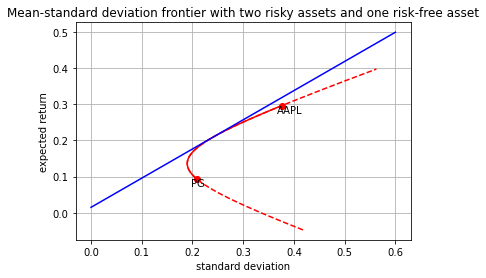

In [44]:
plt.plot(standard_deviation, expected_return, linestyle='-', c='red')
plt.plot(standard_deviation_short, expected_return_short, linestyle='--', c='red')
plt.plot(x, y, linestyle='-',c='blue')
plt.plot(aapl_std,aapl_mean,'ro')
plt.annotate('AAPL', (aapl_std, aapl_mean), xytext=(aapl_std-0.01,aapl_mean-0.02))
plt.plot(pg_std,pg_mean,'ro')
plt.annotate('PG', (pg_std, pg_mean), xytext=(pg_std-0.01,pg_mean-0.02))
plt.xlabel('standard deviation')
plt.ylabel('expected return')
plt.title('Mean-standard deviation frontier with two risky assets and one risk-free asset')
plt.grid(True)
plt.show

### Point (e)
Correlation between Apple’s and P&G’s return from 2010 to 2020.

In [45]:
corr_10_20 = S.PG[(S.PG.index>'2009-12-31') & (S.PG.index<'2020-01-01')].corr(S.AAPL[(S.AAPL.index>'2009-12-31') & (S.AAPL.index<'2020-01-01')])
print('The correlation between Apple and Procter and Gamble from 2010 is:', round(corr_10_20,3),'.')

The correlation between Apple and Procter and Gamble from 2010 is: 0.233 .


Taking only data from 2010 to 2020, the correlation between Apple and Procter and Gamble increases with respect to the one that consider data from 2000. Holding everything else equal, the lower the correlation between stocks the lower the volatility of the minimum variance portfolio. 

### Point (f)
Optimal portfolio when the investor is targeting a standard deviation of 20%.

In [48]:
optimal_std = 0.2
optimal_mean_return = r_f + optimal_sharpe * optimal_std
index_tan = np.argmax(sharpe_ratio)
mean_tan = expected_return[index_tan]
std_tan = standard_deviation[index_tan]
weight_tan = (optimal_mean_return - r_f)/(mean_tan - r_f)
# weight_tan is the proportion of the wealth that the investor invests in the tangent portfolio
# 1 - weight_tan is the proportion of the wealth that the investor invests in the risk free rate 
weight_apple = weight_tan * weight[index_tan]
weight_pg = weight_tan * (1 - weight[index_tan])
weight_rf = 1 - weight_tan

print('The optimal weight for the risk-free asset, Apple and Procter and Gamble are respectively:', round(weight_rf,3), ',', round(weight_apple,3), ',', round(weight_pg,3), '.')

print('The mean return of the optimal portfolio is', round(optimal_mean_return,2), 'and its sharpe ratio is', round(optimal_sharpe,3))


The optimal weight for the risk-free asset, Apple and Procter and Gamble are respectively: 0.165 , 0.472 , 0.363 .
The mean return of the optimal portfolio is 0.18 and its sharpe ratio is 0.806


### Point (g)
Optimal portfolio when the investor is targeting a 99% Var of -10%.

In [49]:
# we call: 
# weight_p the proportion of wealth that I want to put in the tangency portfolio such that VaR=-10%
# mean_p the mean of the portfolio that will have VaR=-10%
# std_p the std of the portfolio that will have VaR=-10%
weight_p = np.linspace(start=0, stop=1.01, num=10000)
mean_p = r_f + optimal_sharpe * weight_p * std_tan
std_p = weight_p * std_tan
Var_99 = -0.1
Var = np.zeros(len(weight_p))
for i in range(len(weight_p)):
    Var[i] = round(norm.ppf(1-0.99, mean_p[i], std_p[i]),4)
index_p = np.where(Var == Var_99)
index_p

(array([3125, 3126, 3127]),)

In [50]:
weight_p[3125]

0.31565656565656564

In [51]:
weight_p[3126]

0.31575757575757574

In [52]:
weight_p[3137]

0.31686868686868686

The optimal weight in the tangency portfolio is 32%. 